# Data Transformation

In previous notebooks we learned how to use marks and visual encodings to represent individual data records. Here we will explore methods for *transforming* data, including the use of aggregates to summarize multiple records. Data transformation is an integral part of visualization: choosing the  variables to show and their level of detail is just as important as choosing appropriate visual encodings. After all, it doesn't matter how well chosen your visual encodings are if you are showing the wrong information!

As you work through this module, we recommend that you open the [Altair Data Transformations documentation](https://altair-viz.github.io/user_guide/transform.html) in another tab. It will be a useful resource if at any point you'd like more details or want to see what other transformations are available.

_This notebook is part of the [data visualization curriculum](https://github.com/uwdata/visualization-curriculum)._

In [1]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## The Movies Dataset

In [2]:
from vega_datasets import data as vega_data
movies_url = vega_data.movies.url
movies = pd.read_json(movies_url)

In [3]:
movies.shape

(3201, 16)

In [4]:
movies.head(5)

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
0,None,None,Gramercy,6.1,1071.0,R,None,8000000.0,Jun 12 1998,NaN,NaN,None,The Land Girls,NaN,146083.0,146083.0
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,Aug 07 1998,NaN,NaN,None,"First Love, Last Rites",NaN,10876.0,10876.0
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,Aug 28 1998,NaN,NaN,None,I Married a Strange Person,NaN,203134.0,203134.0
3,None,None,Fine Line,NaN,NaN,None,Comedy,300000.0,Sep 11 1998,13.0,NaN,None,Let's Talk About Sex,NaN,373615.0,373615.0
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,Oct 09 1998,62.0,NaN,Original Screenplay,Slam,NaN,1009819.0,1087521.0


## Histograms

We'll start our transformation tour by _binning_ data into discrete groups and _counting_ records to summarize those groups. The resulting plots are known as [_histograms_](https://en.wikipedia.org/wiki/Histogram).

Let's first look at unaggregated data: a scatter plot showing movie ratings from Rotten Tomatoes versus ratings from IMDB users. We'll provide data to Altair by passing the movies data URL to the `Chart` method. (We could also pass the Pandas data frame directly to get the same result.) We can then encode the Rotten Tomatoes and IMDB ratings fields using the `x` and `y` channels:

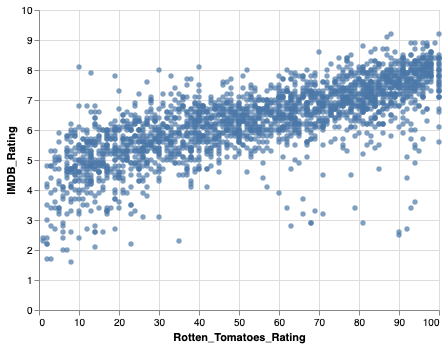

In [5]:
alt.Chart(movies_url).mark_circle().encode(
    alt.X('Rotten_Tomatoes_Rating:Q'),
    alt.Y('IMDB_Rating:Q')
)

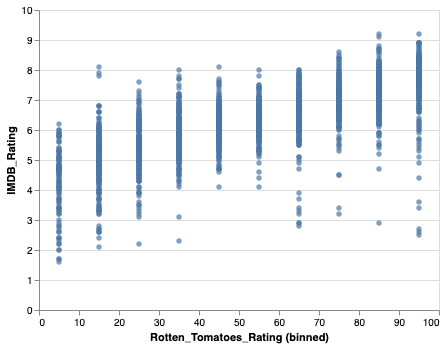

In [6]:
alt.Chart(movies_url).mark_circle().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin=True),
    alt.Y('IMDB_Rating:Q')
)

In [7]:
df=pd.read_json(movies_url)
df.head()

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
0,None,None,Gramercy,6.1,1071.0,R,None,8000000.0,Jun 12 1998,NaN,NaN,None,The Land Girls,NaN,146083.0,146083.0
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,Aug 07 1998,NaN,NaN,None,"First Love, Last Rites",NaN,10876.0,10876.0
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,Aug 28 1998,NaN,NaN,None,I Married a Strange Person,NaN,203134.0,203134.0
3,None,None,Fine Line,NaN,NaN,None,Comedy,300000.0,Sep 11 1998,13.0,NaN,None,Let's Talk About Sex,NaN,373615.0,373615.0
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,Oct 09 1998,62.0,NaN,Original Screenplay,Slam,NaN,1009819.0,1087521.0


## Creating a histogram using Pandas

In [18]:
df['binned_rating']=pd.cut(df['Rotten_Tomatoes_Rating'], 20).apply(lambda x: x.mid)

In [23]:
df2=df.groupby('binned_rating')[['Title']].count().reset_index()
df2.head()

,binned_rating,Title
0,3.4255,40
1,8.4250,93
2,13.3750,127
3,18.3250,107
4,23.2750,113


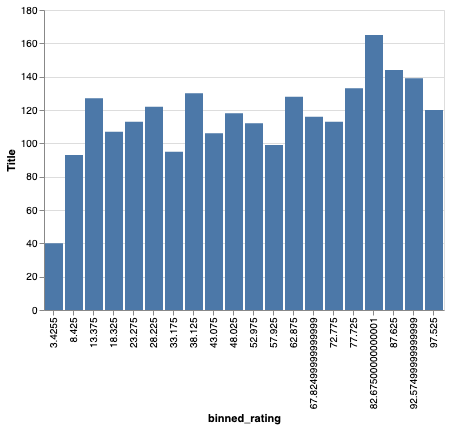

In [26]:
alt.Chart(df2).mark_bar().encode(
    x='binned_rating',
    y='Title'
)

## Creating a histogram using Altair

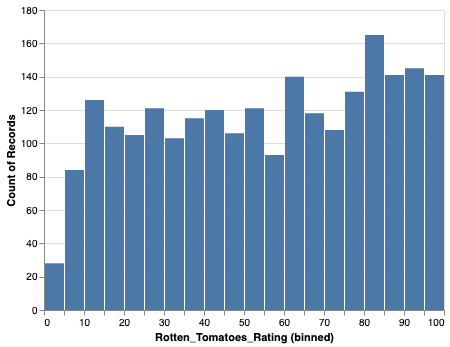

In [27]:
alt.Chart(movies_url).mark_bar().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin=alt.BinParams(maxbins=20)),
    y='count()'
)

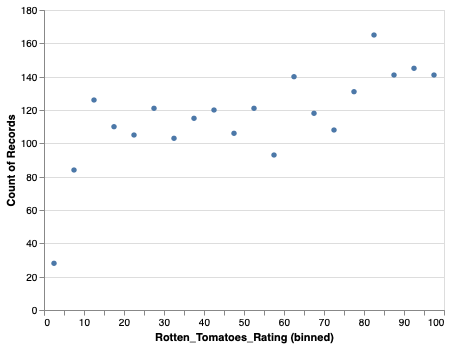

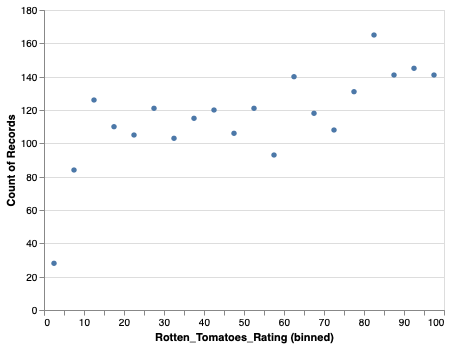

In [8]:
alt.Chart(movies_url).mark_circle().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('count()')
)

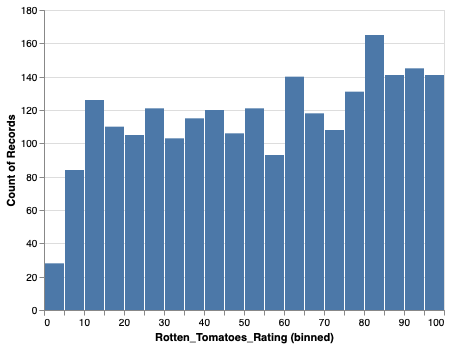

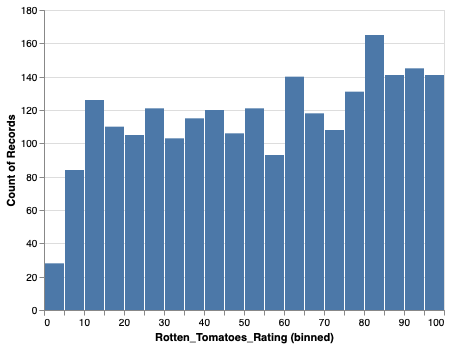

In [9]:
alt.Chart(movies_url).mark_bar().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('count()')
)

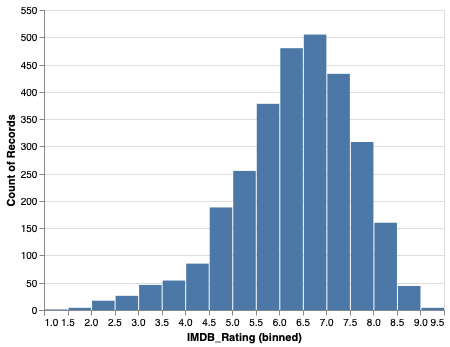

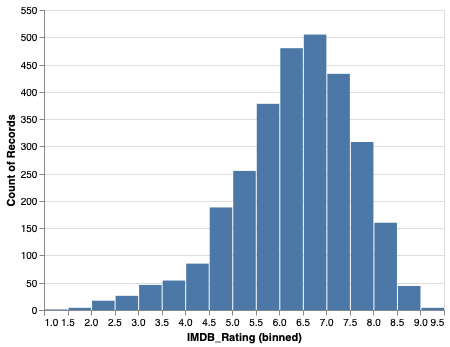

In [10]:
alt.Chart(movies_url).mark_bar().encode(
    alt.X('IMDB_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('count()')
)

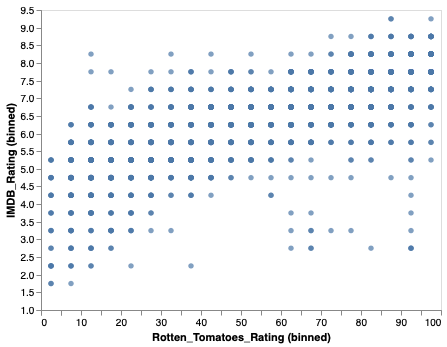

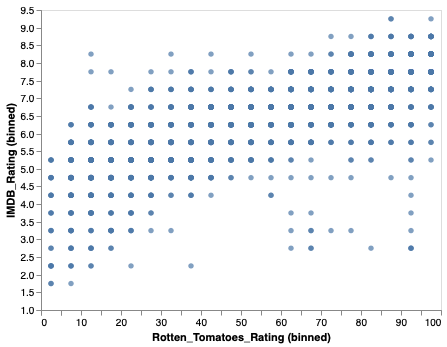

In [11]:
alt.Chart(movies_url).mark_circle().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('IMDB_Rating:Q', bin=alt.BinParams(maxbins=20)),
)

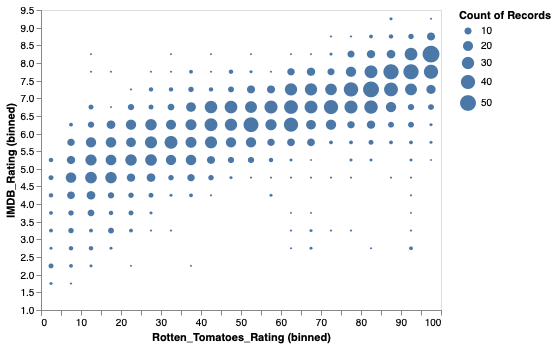

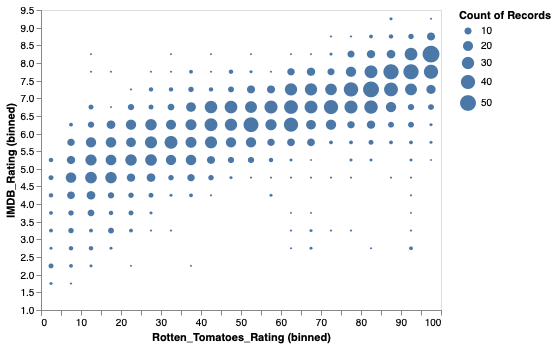

In [12]:
alt.Chart(movies_url).mark_circle().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('IMDB_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Size('count()')
)

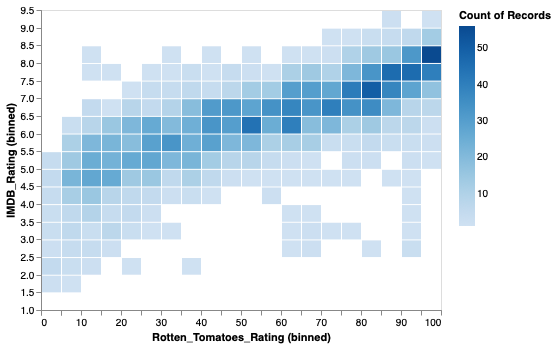

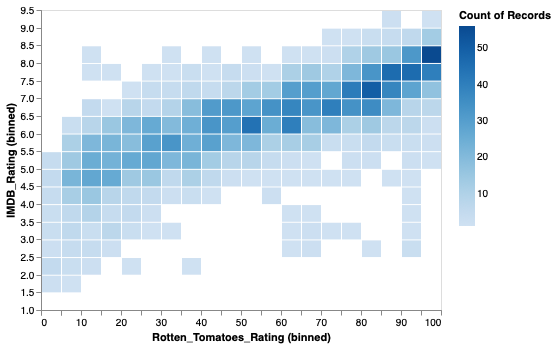

In [13]:
alt.Chart(movies_url).mark_bar().encode(
    alt.X('Rotten_Tomatoes_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('IMDB_Rating:Q', bin=alt.BinParams(maxbins=20)),
    alt.Color('count()')
)

## Aggregation

Counts are just one type of aggregate. We might also calculate summaries using measures such as the `average`, `median`, `min`, or `max`. The Altair documentation includes the [full set of available aggregation functions](https://altair-viz.github.io/user_guide/encoding.html#encoding-aggregates).

Let's look at some examples!

### Averages and Sorting

_Do different genres of films receive consistently different ratings from critics?_ As a first step towards answering this question, we might examine the [*average* (a.k.a. the *arithmetic mean*)](https://en.wikipedia.org/wiki/Arithmetic_mean) rating for each genre of movie.

Let's visualize genre along the `y` axis and plot `average` Rotten Tomatoes ratings along the `x` axis.

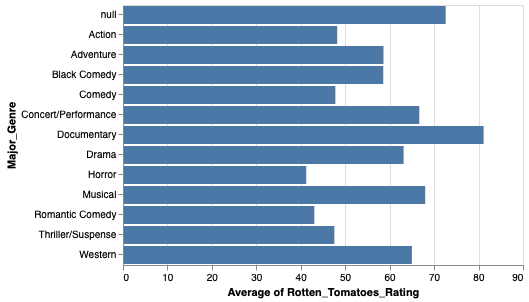

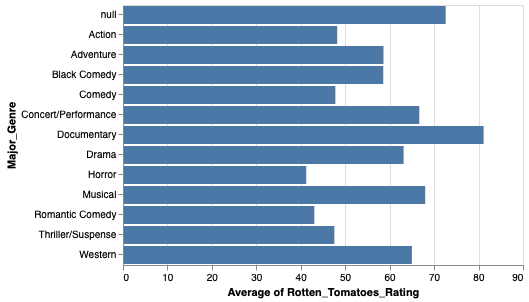

In [14]:
alt.Chart(movies_url).mark_bar().encode(
    alt.X('average(Rotten_Tomatoes_Rating):Q'),
    alt.Y('Major_Genre:N')
)

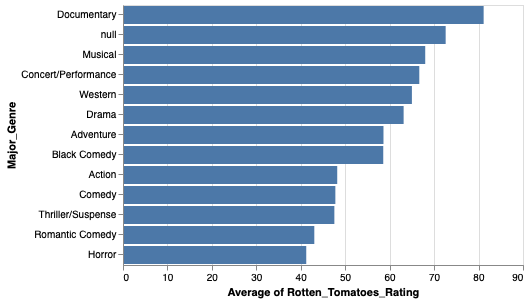

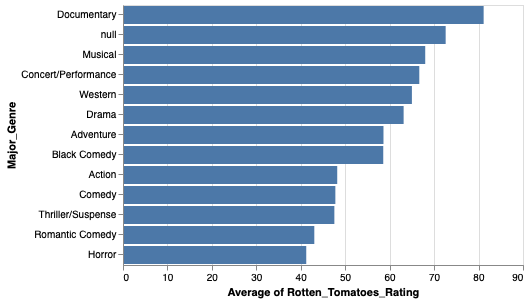

In [15]:
alt.Chart(movies_url).mark_bar().encode(
    alt.X('average(Rotten_Tomatoes_Rating):Q'),
    alt.Y('Major_Genre:N', sort=alt.EncodingSortField(
        op='average', field='Rotten_Tomatoes_Rating', order='descending')
    )
)

### Medians and the Inter-Quartile Range

While averages are a common way to summarize data, they can sometimes mislead. For example, very large or very small values ([*outliers*](https://en.wikipedia.org/wiki/Outlier)) might skew the average. To be safe, we can compare the genres according to the [*median*](https://en.wikipedia.org/wiki/Median) ratings as well.

The median is a point that splits the data evenly, such that half of the values are less than the median and the other half are greater. The median is less sensitive to outliers and so is referred to as a [*robust* statistic](https://en.wikipedia.org/wiki/Robust_statistics). For example, arbitrarily increasing the largest rating value will not cause the median to change.

Let's update our plot to use a `median` aggregate and sort by those values:

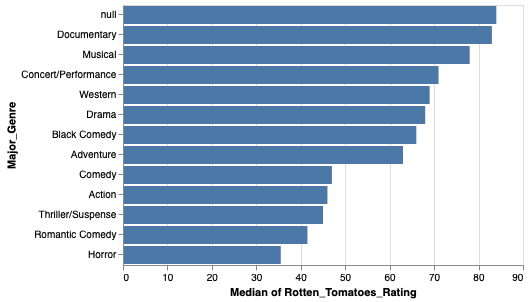

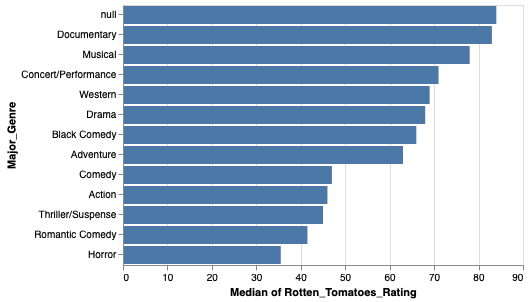

In [16]:
alt.Chart(movies_url).mark_bar().encode(
    alt.X('median(Rotten_Tomatoes_Rating):Q'),
    alt.Y('Major_Genre:N', sort=alt.EncodingSortField(
        op='median', field='Rotten_Tomatoes_Rating', order='descending')
    )
)

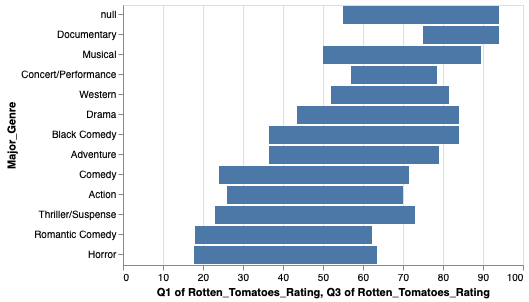

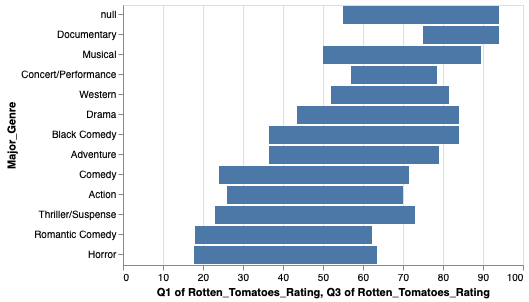

In [17]:
alt.Chart(movies_url).mark_bar().encode(
    alt.X('q1(Rotten_Tomatoes_Rating):Q'),
    alt.X2('q3(Rotten_Tomatoes_Rating):Q'),
    alt.Y('Major_Genre:N', sort=alt.EncodingSortField(
        op='median', field='Rotten_Tomatoes_Rating', order='descending')
    )
)

### Time Units

_Now let's ask a completely different question: do box office returns vary by season?_

To get an initial answer, let's plot the median U.S. gross revenue by month.

To make this chart, use the `timeUnit` transform to map release dates to the `month` of the year. The result is similar to binning, but using meaningful time intervals. Other valid time units include `year`, `quarter`, `date` (numeric day in month), `day` (day of the week), and `hours`, as well as compound units such as `yearmonth` or `hoursminutes`. See the Altair documentation for a [complete list of time units](https://altair-viz.github.io/user_guide/transform.html#timeunit-transform).

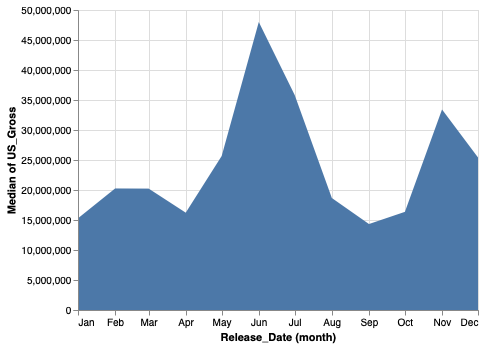

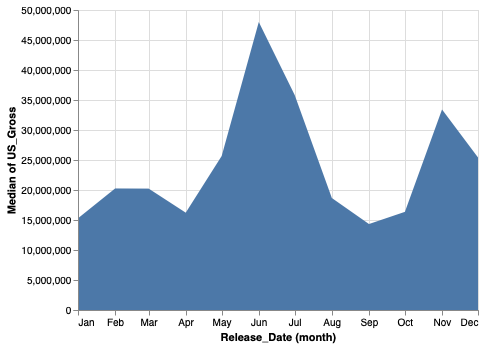

In [18]:
alt.Chart(movies_url).mark_area().encode(
    alt.X('month(Release_Date):T'),
    alt.Y('median(US_Gross):Q')
)

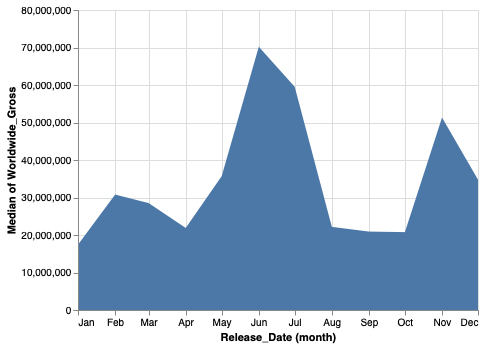

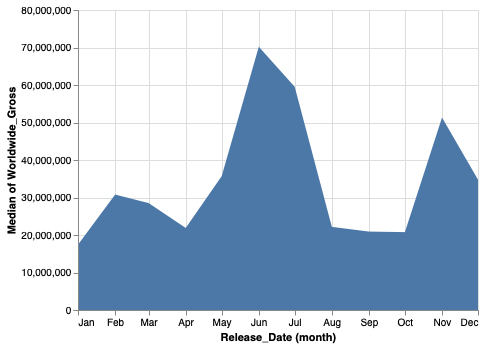

In [19]:
alt.Chart(movies_url).mark_area().encode(
    alt.X('month(Release_Date):T'),
    alt.Y('median(Worldwide_Gross):Q')
)